#  Data Cleansing with Pandas

# Step 1) Download Data 
ทำการ import pandas

In [1]:
!wget -O data.zip https://file.designil.com/zdOfUE+
!unzip data.zip

--2022-08-21 01:25:19--  https://file.designil.com/zdOfUE+
Resolving file.designil.com (file.designil.com)... 104.21.8.81, 172.67.130.97, 2606:4700:3035::ac43:8261, ...
Connecting to file.designil.com (file.designil.com)|104.21.8.81|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-std.droplr.net/files/acc_513973/zdOfUE [following]
--2022-08-21 01:25:19--  https://cdn-std.droplr.net/files/acc_513973/zdOfUE
Resolving cdn-std.droplr.net (cdn-std.droplr.net)... 108.138.94.96, 108.138.94.41, 108.138.94.90, ...
Connecting to cdn-std.droplr.net (cdn-std.droplr.net)|108.138.94.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6704411 (6.4M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   6.39M  --.-KB/s    in 0.06s   

2022-08-21 01:25:19 (101 MB/s) - ‘data.zip’ saved [6704411/6704411]

Archive:  data.zip
  inflating: ws2_data.csv            


In [2]:
import pandas as pd

In [238]:
df_book = pd.read_csv('/content/ws2_data.csv')

# Step 2) Data Profiling

In [239]:
# เช็คคอลัมน์มีอะไรบ้าง

df_book.columns

Index(['timestamp', 'user_id', 'book_id', 'country', 'price'], dtype='object')

In [240]:
# ข้อมูล 5 แถวแรก
df_book.head()

,timestamp,user_id,book_id,country,price
0,2021-05-01 08:03:44,824dc295,2,Israel,24.95
1,2021-05-02 02:48:34,f80fe106,6,Thailand,31.49
2,2021-05-01 16:54:57,01cb9fe0,9,Italy,29.65
3,2021-05-01 21:45:28,59508f47,13,South Africa,22.40
4,2021-05-01 14:50:52,3553ebbb,14,Canada,28.00


In [241]:
# ข้อมูล 5 ล่างสุด
df_book.tail()

,timestamp,user_id,book_id,country,price
499995,2021-07-31 22:29:43,724d7ac3,2269,United States of America,35.71
499996,2021-07-31 22:43:46,c3d3e071,2269,United States of America,35.71
499997,2021-07-31 22:44:57,1868f828,2269,Croatia,35.71
499998,2021-07-31 23:15:58,a559ace4,2269,United States of America,35.71
499999,2021-07-31 23:34:02,7707cbcb,2269,United States of America,35.71


In [242]:
# type แต่ละคอลัมน์
df_book.dtypes

timestamp     object
user_id       object
book_id        int64
country       object
price        float64
dtype: object

In [243]:
df_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  500000 non-null  object 
 1   user_id    499998 non-null  object 
 2   book_id    500000 non-null  int64  
 3   country    500000 non-null  object 
 4   price      500000 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 19.1+ MB


In [244]:
# ดูจำนวนแถว
print(df_book.count())

timestamp    500000
user_id      499998
book_id      500000
country      500000
price        500000
dtype: int64


In [245]:
# ดูจำนวนแถวและคอลัมน์
df_book.shape

(500000, 5)

คอลัมน์ไหนมี Missing Value บ้าง? 

In [246]:
df_book.isna().sum()

timestamp    0
user_id      2
book_id      0
country      0
price        0
dtype: int64

In [247]:
df_book[df_book['user_id'].isna()]

,timestamp,user_id,book_id,country,price
2859,2021-05-01 14:41:20,NaN,516,Brazil,27.37
330028,2021-06-30 02:27:00,NaN,1390,Japan,27.99


คอลัมน์ user_id มี id ca86d17200 เกิน 8 หลัก ค่อยจัดการทีหลัง

In [248]:
df_book.query("user_id == 'ca86d17200' ")

,timestamp,user_id,book_id,country,price
272850,2021-06-19 16:00:22,ca86d17200,2269,United States of America,35.71
411245,2021-07-15 18:53:09,ca86d17200,322,United States of America,30.79


# Step 3) EDA - Exploratory Data Analysis

### Non-Graphical EDA แบบใช้ตัวเลข


In [249]:
# ข้อมูลที่เป็นตัวเลข
df_book[df_book['price'] >= 30 ].sort_values('price')

,timestamp,user_id,book_id,country,price
148892,2021-05-27 05:26:45,de147c83,1613,United States of America,30.09
428252,2021-07-17 22:02:40,0610ec48,1613,Colombia,30.09
422131,2021-07-16 15:16:40,785dc958,2268,South Korea,30.09
51469,2021-05-10 06:20:51,eea1d197,1613,United Kingdom,30.09
310260,2021-06-26 05:06:14,58d9ea0a,1341,United States of America,30.09
...,...,...,...,...,...
87786,2021-05-17 07:45:18,40eae975,635,China,84.00
484014,2021-07-28 12:29:23,2bc0f31e,635,Montenegro,84.00
490502,2021-07-29 21:41:37,3b17a140,635,United States of America,84.00
74837,2021-05-14 22:59:55,52e50743,635,Thailand,84.00


In [250]:
df_book[(df_book['price'] >= 30 ) & (df_book['country'] == 'United States of America') ]

,timestamp,user_id,book_id,country,price
5,2021-05-01 08:41:48,ea28260a,16,United States of America,31.18
6,2021-05-01 05:51:43,ff44767e,18,United States of America,59.99
73,2021-05-01 00:36:32,3c1d11ff,31,United States of America,34.22
76,2021-05-01 02:38:49,f65bfa55,31,United States of America,34.22
78,2021-05-01 03:46:48,77ef592e,31,United States of America,34.22
...,...,...,...,...,...
499989,2021-07-31 17:59:12,4ae5a623,2269,United States of America,35.71
499995,2021-07-31 22:29:43,724d7ac3,2269,United States of America,35.71
499996,2021-07-31 22:43:46,c3d3e071,2269,United States of America,35.71
499998,2021-07-31 23:15:58,a559ace4,2269,United States of America,35.71


In [251]:
# ดูข้อมูลที่เป็นตัวหนังสือ
df_book.query('country == "Thailand" ')

,timestamp,user_id,book_id,country,price
1,2021-05-02 02:48:34,f80fe106,6,Thailand,31.49
58,2021-05-01 02:48:58,405a6c88,30,Thailand,14.95
182,2021-05-02 01:10:03,6e47e5bc,36,Thailand,23.95
247,2021-05-01 16:27:41,b1171275,46,Thailand,31.93
269,2021-05-01 02:48:35,03c9dd6b,56,Thailand,24.95
...,...,...,...,...,...
499524,2021-07-31 07:35:11,9ec4caef,1614,Thailand,28.00
499620,2021-07-31 00:13:59,397b264a,1643,Thailand,35.00
499826,2021-07-31 06:12:49,d3db8f62,1855,Thailand,19.95
499841,2021-07-31 15:54:44,52ec69ee,1932,Thailand,0.00


หาเดือนที่หนังสือวางจำหน่าย ทำการหา Year และ Month ว่าหนังสือถูกขายปีไหน เดือนไหนบ้าง

ทำการแปลงคอลัมน์ timestamp เป็น datetime เพื่อ query ข้อมูลปี เดือน วันให้ง่ายขึ้น

In [252]:
# แปลงคอลัมน์ timestamp  to_datetime 
df_book['timestamp'] = pd.to_datetime(df_book['timestamp'])

In [253]:
df_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  500000 non-null  datetime64[ns]
 1   user_id    499998 non-null  object        
 2   book_id    500000 non-null  int64         
 3   country    500000 non-null  object        
 4   price      500000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 19.1+ MB


In [254]:
df_book['timestamp'].groupby(df_book.timestamp.dt.year).agg('count')

timestamp
2021    500000
Name: timestamp, dtype: int64

In [255]:
df_book['timestamp'].groupby(df_book.timestamp.dt.month).agg('count')

timestamp
5    168755
6    162664
7    168581
Name: timestamp, dtype: int64

In [256]:
# หาหนังสือทีถูกซื้อในเดือน 6 อยู่ใน country United States of America, United Kingdom มีกี่แถว
df_book[df_book['timestamp'].dt.month == 6].\
    query('country == "United States of America" | country == "United Kingdom" ').\
    shape

(77499, 5)

ตัวเลขทางสถิติ ค่าสถิติเบื้องต้นของทุกคอลัมน์ที่เป็นตัวเลข

In [257]:
df_book.describe()

,book_id,price
count,500000.000000,500000.000000
mean,740.377786,31.459312
std,559.936617,10.945931
min,1.000000,0.000000
25%,262.000000,24.950000
50%,614.000000,29.990000
75%,1217.000000,34.990000
max,2269.000000,84.000000


In [258]:
# ยอดรวมขายทั้งหมดแต่ละประเทศ
df_book.groupby('country').sum()

,book_id,price
country,,
Algeria,3675971,157646.10
Argentina,3713620,156775.30
Australia,9451375,397731.98
Austria,3754976,159911.80
Bahamas,3706156,155578.59
Belgium,3687251,155918.40
Brazil,3715474,159913.00
Canada,23204924,980827.69
China,3609311,156148.64


In [259]:
df_book.groupby('country')['price'].sum()

country
Algeria                      157646.10
Argentina                    156775.30
Australia                    397731.98
Austria                      159911.80
Bahamas                      155578.59
Belgium                      155918.40
Brazil                       159913.00
Canada                       980827.69
China                        156148.64
Colombia                     155434.02
Croatia                      158081.67
Denmark                      154173.38
Dubai                          7713.91
Egypt                          8257.40
Estonia                        7112.60
Finland                      160563.26
France                       153866.38
Germany                      161601.90
Greece                       157595.36
Hungary                      153811.12
India                        156190.97
Indonesia                    153569.03
Ireland                      157288.90
Israel                       159116.28
Italy                        157318.98
Jamaica          

In [260]:
# ข้อมูลสถิติโดยเลือกคอลัมน์ price
df_book[['price']].describe()

,price
count,500000.000000
mean,31.459312
std,10.945931
min,0.000000
25%,24.950000
50%,29.990000
75%,34.990000
max,84.000000


In [261]:
df_book.groupby('country')['price'].agg(['sum', 'mean', 'min', 'max'])

,sum,mean,min,max
country,,,,
Algeria,157646.10,31.397351,0.00,84.00
Argentina,156775.30,31.582454,0.00,71.93
Australia,397731.98,31.312548,0.00,84.00
Austria,159911.80,31.615619,0.00,84.00
Bahamas,155578.59,31.436369,0.00,71.93
Belgium,155918.40,31.428825,0.00,84.00
Brazil,159913.00,31.547248,0.00,84.00
Canada,980827.69,31.450898,0.00,84.00
China,156148.64,31.564310,0.00,84.00


##EDA แบบใช้กราฟฟิก

In [262]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

## Seaborn

Histograms

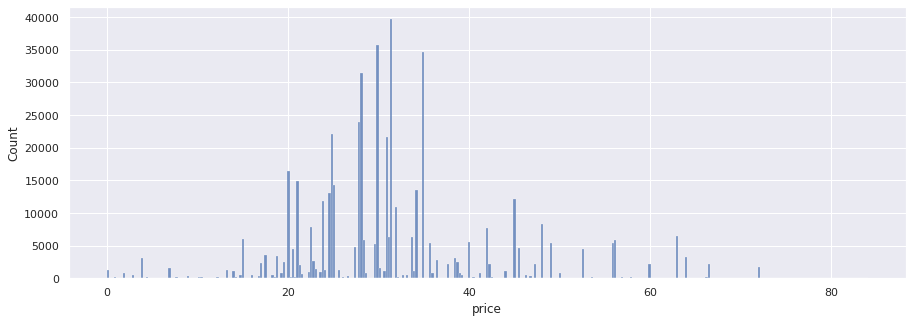

In [263]:
plt.figure(figsize=(15,5))
sns.set(style='darkgrid')
sns.histplot(x=df_book['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


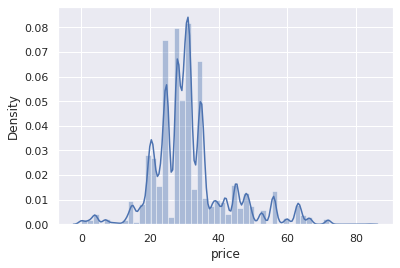

In [264]:
sns.distplot(df_book['price'])

count plots

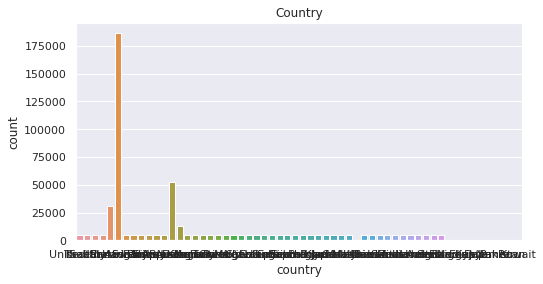

In [265]:
plt.figure(figsize=(8, 4))
plt.title('Country')
sns.countplot(x='country', data=df_book)

BoxPlot

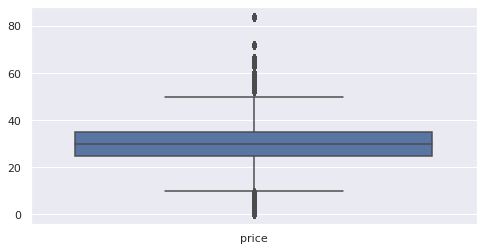

In [266]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_book[['price']])

Scatter Plot

In [267]:
df_book.columns

Index(['timestamp', 'user_id', 'book_id', 'country', 'price'], dtype='object')

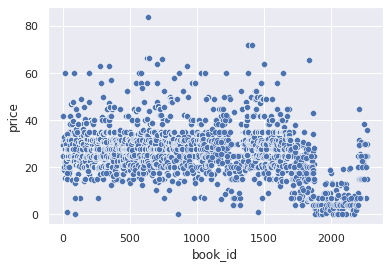

In [268]:
sns.scatterplot(x='book_id', y='price', data=df_book)

## matplotlib

Histogram

(array([8.50500e+03, 1.09970e+04, 1.29633e+05, 1.92445e+05, 8.67160e+04,
        3.91740e+04, 1.63360e+04, 1.44200e+04, 1.68300e+03, 9.10000e+01]),
 array([ 0. ,  8.4, 16.8, 25.2, 33.6, 42. , 50.4, 58.8, 67.2, 75.6, 84. ]),
 <a list of 10 Patch objects>)

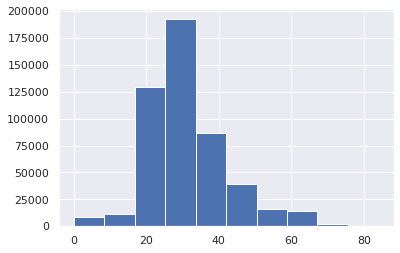

In [269]:
plt.hist(df_book.price)

(array([1.51040e+04, 2.22773e+05, 1.48520e+04, 1.49280e+04, 6.99120e+04,
        1.51300e+04, 9.93000e+03, 1.51600e+04, 1.51230e+04, 1.51760e+04,
        1.48470e+04, 1.51190e+04, 1.02660e+04, 1.00200e+04, 1.50410e+04,
        1.49480e+04, 1.01920e+04, 8.10000e+02, 6.00000e+02, 6.90000e+01]),
 array([ 0.  ,  2.85,  5.7 ,  8.55, 11.4 , 14.25, 17.1 , 19.95, 22.8 ,
        25.65, 28.5 , 31.35, 34.2 , 37.05, 39.9 , 42.75, 45.6 , 48.45,
        51.3 , 54.15, 57.  ]),
 <a list of 20 Patch objects>)

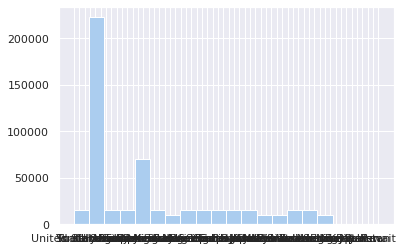

In [270]:
plt.hist(df_book.country, bins=20, color='#abcdef')

# Step 4) Data Cleansing with Pandas

มาทำความสะอาดข้อมูลด้วย Pandas

### แปลง Data Type 

ตรวจสอบ Type ของคอลัมน์ถูกต้องไหม เปลี่ยน Data Type ให้ตรงกับ Type

In [271]:
# แปลงคอลัมน์ตัวเลข 
df_book['price'] = df_book['price'].astype(float)

In [272]:
# แปลงคอลัมน์ date
df_book['timestamp'] = pd.to_datetime(df_book['timestamp'])

In [273]:
df_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  500000 non-null  datetime64[ns]
 1   user_id    499998 non-null  object        
 2   book_id    500000 non-null  int64         
 3   country    500000 non-null  object        
 4   price      500000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 19.1+ MB


## Anomalies Check

ใช้ pandas ตามหาสิ่งที่ผิดปกติในข้อมูล

### ความผิดปกติ 1) Syntactical Anomalies
**Lexical errors** เช่น สะกดผิด

ตรวจสอบประเทศที่สะกดผิด

show ชื่อประเทศทั้งหมดโดย sort เรียงตามตัวอักษร เพื่อดูประเทศที่สะกดผิด

In [274]:
# นับจำนวนประเทศ
df_book['country'].nunique()

58

In [275]:
df_book['country'].value_counts().sort_index(ascending=True)

Algeria                       5021
Argentina                     4964
Australia                    12702
Austria                       5058
Bahamas                       4949
Belgium                       4961
Brazil                        5069
Canada                       31186
China                         4947
Colombia                      4981
Croatia                       5009
Denmark                       4881
Dubai                          248
Egypt                          261
Estonia                        232
Finland                       5110
France                        4954
Germany                       5113
Greece                        5027
Hungary                       4951
India                         4950
Indonesia                     4872
Ireland                       4971
Israel                        5049
Italy                         5002
Jamaica                       5111
Japan                         4999
Japane                         106
Kenya               

Japane ประเทศที่สะกดผิด

In [276]:
# มีทั้งหมด 106 แถวที่ผิด
df_book.query('country == "Japane" ')

,timestamp,user_id,book_id,country,price
4862,2021-05-01 13:11:11,a904217a,1129,Japane,29.65
12044,2021-05-02 10:27:42,a6052e97,1466,Japane,35.00
18580,2021-05-04 10:44:41,a0f44c26,1497,Japane,17.49
19418,2021-05-04 05:40:46,ad0f9907,2269,Japane,35.71
24688,2021-05-05 01:08:25,aa169f5d,1378,Japane,59.93
...,...,...,...,...,...
473642,2021-07-26 12:08:01,a11afa0c,1613,Japane,30.09
478808,2021-07-27 21:19:07,ae5b69f1,1018,Japane,31.50
479249,2021-07-27 13:12:32,aef227e0,1358,Japane,34.99
492722,2021-07-30 04:45:55,a765a687,1475,Japane,31.50


เปลี่ยนชื่อประเทศ Japane ให้เป็น Japan

In [277]:
df_book['country'] = df_book.apply(lambda x: x['country'].replace("Japane","Japan"), axis=1)

In [278]:
# เช็ต Japane หายไปแล้วยัง
df_book.query('country == "Japane" ')

,timestamp,user_id,book_id,country,price


In [279]:
# จำนวนประเทศต้องเหลือ 57 ประเทศ 
df_book['country'].nunique()

57

### ความผิดปกติ 2) Semantic Anomalies

**Integrity constraints**: ค่าอยู่นอกเหนือขอบเขตของค่าที่รับได้ เช่น
- user_id: ค่าจะต้องเป็นตัวเลขหรือตัวหนังสือ 8 ตัวอักษร

แก้ไข user_id ca86d17200 ให้เป็น ca86d172

In [280]:
# จัดการ user_id ที่เกิน 8 หลัก
df_book['user_id'] = df_book['user_id'].str.replace("ca86d17200","ca86d172")

In [281]:
# เช็คว่า id ca86d17200 ยังมีในข้อมูลอีกไหม
df_book.query("user_id == 'ca86d17200' ")

,timestamp,user_id,book_id,country,price


### ความผิดปกติ 3) Missing values

การเช็คและแก้ไข Missing Values (หากจำเป็น)

ค่า Missing Value คือ ค่าที่ว่างเปล่า

เราจะรู้ได้ยังไงว่าคอลัมน์ไหนมีค่าว่างเปล่ากี่ค่า

In [282]:
df_book.isna().sum()

timestamp    0
user_id      2
book_id      0
country      0
price        0
dtype: int64

In [283]:
df_book.dtypes

timestamp    datetime64[ns]
user_id              object
book_id               int64
country              object
price               float64
dtype: object

In [284]:
df_book['user_id'] = df_book['user_id'].fillna('00000000')

In [289]:
df_book[df_book['user_id'].isna()]

,timestamp,user_id,book_id,country,price


In [288]:
df_book.query('user_id == "00000000" ')

,timestamp,user_id,book_id,country,price
2859,2021-05-01 14:41:20,00000000,516,Brazil,27.37
330028,2021-06-30 02:27:00,00000000,1390,Japan,27.99


In [287]:
df_book.isna().sum()

timestamp    0
user_id      0
book_id      0
country      0
price        0
dtype: int64

# Step 5) Save data เป็น CSV

โดยปกติแล้ว Spark จะทำการ Save ออกมาเป็นหลายไฟล์ เพราะใช้หลายเครื่องในการประมวลผล

In [295]:
df_book.to_csv('df_book_final.csv', index=False)